In [19]:
import pandas as pd 
df=pd.read_csv("circus_rides_death_analysis.csv")
df

,Year,Ride,Location,Total_Visitors,Accidents,Deaths,Injuries,Cause,Inspection_Status
0,2000,Ferris Wheel,Brazil,12296,0,0,0,Human Error,Regular
1,2000,Roller Coaster,India,11717,2,2,0,Poor Maintenance,Regular
2,2000,Swing Ride,USA,11140,6,1,5,Unknown,NaN
3,2000,Drop Tower,USA,41781,6,5,1,Unknown,Irregular
4,2000,Bumper Cars,India,34439,8,0,8,Human Error,NaN
...,...,...,...,...,...,...,...,...,...
170,2024,Swing Ride,Brazil,22919,13,13,0,Poor Maintenance,Irregular
171,2024,Drop Tower,India,34935,4,3,1,Human Error,NaN
172,2024,Bumper Cars,Japan,13946,2,1,1,Poor Maintenance,Irregular
173,2024,Haunted House,Australia,38275,8,0,8,Weather Issue,NaN


In [20]:
df.shape

(175, 9)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               175 non-null    int64 
 1   Ride               175 non-null    object
 2   Location           175 non-null    object
 3   Total_Visitors     175 non-null    int64 
 4   Accidents          175 non-null    int64 
 5   Deaths             175 non-null    int64 
 6   Injuries           175 non-null    int64 
 7   Cause              175 non-null    object
 8   Inspection_Status  115 non-null    object
dtypes: int64(5), object(4)
memory usage: 12.4+ KB


In [22]:
df.describe()

,Year,Total_Visitors,Accidents,Deaths,Injuries
count,175.000000,175.000000,175.000000,175.000000,175.000000
mean,2012.000000,28295.245714,7.474286,3.628571,3.845714
std,7.231794,12708.870327,4.655755,3.661588,3.815301
min,2000.000000,5110.000000,0.000000,0.000000,0.000000
25%,2006.000000,17460.000000,4.000000,1.000000,1.000000
50%,2012.000000,29836.000000,7.000000,2.000000,3.000000
75%,2018.000000,39178.000000,11.000000,6.000000,6.000000
max,2024.000000,49388.000000,15.000000,15.000000,14.000000


In [23]:
df["Ride"].unique()

array(['Ferris Wheel', 'Roller Coaster', 'Swing Ride', 'Drop Tower',
       'Bumper Cars', 'Haunted House', 'Water Slide'], dtype=object)

In [24]:
df["Ride"].nunique()

7

In [25]:
df["Location"].unique()

array(['Brazil', 'India', 'USA', 'Germany', 'Japan', 'Australia', 'UK'],
      dtype=object)

In [26]:
df["Location"].nunique()

7

In [27]:
df.isnull().sum()

Year                  0
Ride                  0
Location              0
Total_Visitors        0
Accidents             0
Deaths                0
Injuries              0
Cause                 0
Inspection_Status    60
dtype: int64

In [29]:
df["Inspection_Status"]=df["Inspection_Status"].mode().min()

In [30]:
df.isnull().sum()

Year                 0
Ride                 0
Location             0
Total_Visitors       0
Accidents            0
Deaths               0
Injuries             0
Cause                0
Inspection_Status    0
dtype: int64

<Axes: xlabel='Total_Visitors'>

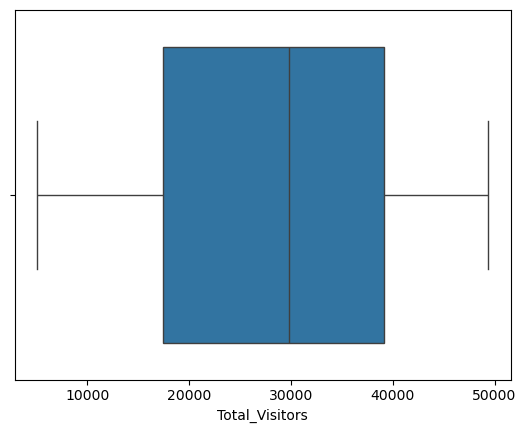

In [31]:
import seaborn as sns
sns.boxplot(x="Total_Visitors",data=df)

<Axes: xlabel='Accidents'>

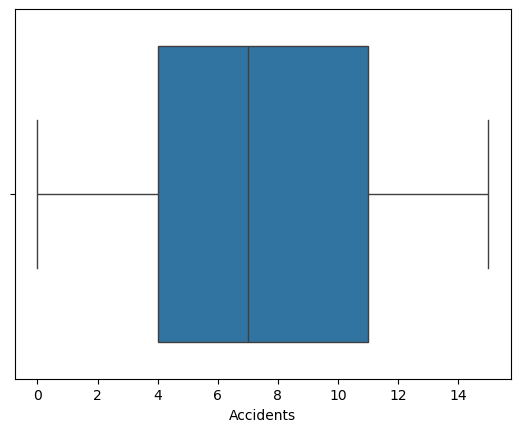

In [32]:
sns.boxplot(x="Accidents",data=df)

<Axes: xlabel='Deaths'>

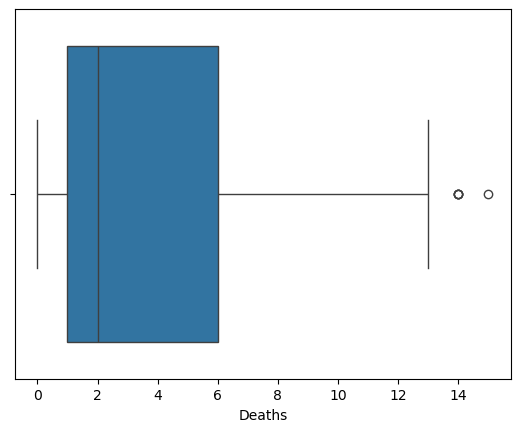

In [33]:
sns.boxplot(x="Deaths",data=df)

<Axes: xlabel='Deaths', ylabel='Count'>

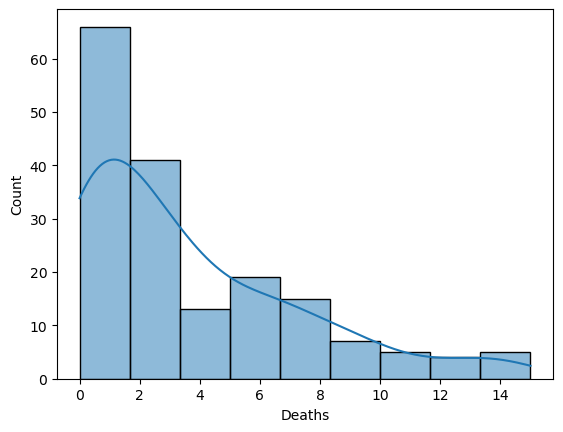

In [35]:
sns.histplot(x="Deaths",data=df,kde=True)

In [36]:
df.describe()

,Year,Total_Visitors,Accidents,Deaths,Injuries
count,175.000000,175.000000,175.000000,175.000000,175.000000
mean,2012.000000,28295.245714,7.474286,3.628571,3.845714
std,7.231794,12708.870327,4.655755,3.661588,3.815301
min,2000.000000,5110.000000,0.000000,0.000000,0.000000
25%,2006.000000,17460.000000,4.000000,1.000000,1.000000
50%,2012.000000,29836.000000,7.000000,2.000000,3.000000
75%,2018.000000,39178.000000,11.000000,6.000000,6.000000
max,2024.000000,49388.000000,15.000000,15.000000,14.000000


In [37]:
import numpy as np
def replace_outliers(dataframe,feature):
    Q1=dataframe[feature].quantile(0.25)
    Q3=dataframe[feature].quantile(0.75)
    IQR=Q3-Q1
    a=Q1-1.5*IQR  # lower
    b=Q3+1.5*IQR  # upper

    dataframe[feature]=np.where(dataframe[feature]>b,b,dataframe[feature])
    dataframe[feature]=np.where(dataframe[feature]<a,a,dataframe[feature])

In [39]:
replace_outliers(df,"Deaths")

<Axes: xlabel='Deaths'>

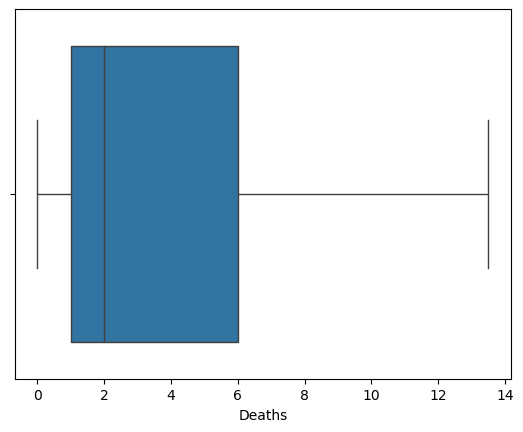

In [40]:
sns.boxplot(x="Deaths",data=df)

<Axes: xlabel='Injuries'>

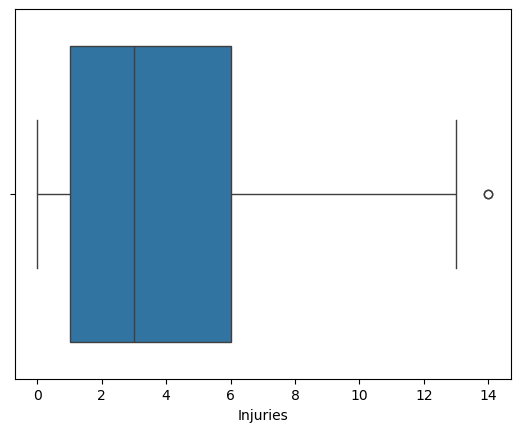

In [34]:
sns.boxplot(x="Injuries",data=df)

In [41]:
import matplotlib.pyplot as plt

In [43]:
data=df.groupby("Year")[["Deaths","Accidents"]].sum()
data

,Deaths,Accidents
Year,,
2000,11.0,42
2001,20.0,26
2002,27.0,46
2003,25.0,56
2004,20.0,69
2005,17.0,31
2006,15.0,37
2007,18.0,46
2008,9.0,26


C:\Users\admin\AppData\Local\Temp\ipykernel_1568\3273826492.py:36: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


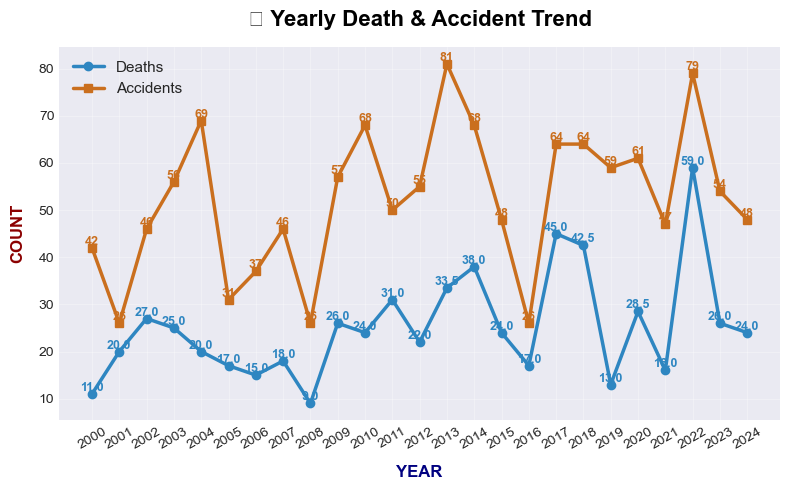

In [49]:

plt.style.use("seaborn-v0_8-darkgrid")

# Define custom colors
colors = ["#2E86C1", "#CA6F1E"]  # blue for deaths, orange for accidents

fig, ax = plt.subplots(figsize=(8,5))

# Plot deaths
ax.plot(yearly["Year"], yearly["Deaths"], 
        color=colors[0], marker="o", linewidth=2.5, label="Deaths")

# Plot accidents
ax.plot(yearly["Year"], yearly["Accidents"], 
        color=colors[1], marker="s", linewidth=2.5, label="Accidents")

# Title & Labels
plt.title("📈 Yearly Death & Accident Trend", fontsize=16, fontweight="bold", color="black", pad=15)
plt.xlabel("YEAR", fontsize=12, fontweight="bold", color="navy", labelpad=10)
plt.ylabel("COUNT", fontsize=12, fontweight="bold", color="darkred", labelpad=10)

# Annotate values on lines
for i, val in enumerate(yearly["Deaths"]):
    ax.annotate(f"{val}", (yearly["Year"][i], val), 
                ha="center", va="bottom", fontsize=9, color=colors[0], fontweight="bold")

for i, val in enumerate(yearly["Accidents"]):
    ax.annotate(f"{val}", (yearly["Year"][i], val), 
                ha="center", va="bottom", fontsize=9, color=colors[1], fontweight="bold")

# Styling
plt.xticks(yearly["Year"], rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(frameon=False, fontsize=11)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [52]:
data2=df.groupby("Ride")["Deaths"].sum()
data2

Ride
Bumper Cars       114.5
Drop Tower         88.0
Ferris Wheel       78.5
Haunted House      80.0
Roller Coaster     86.5
Swing Ride         85.0
Water Slide        99.0
Name: Deaths, dtype: float64

In [62]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Deaths", y="Ride", palette="rocket", edgecolor="black", linewidth=1.5)
for index, value in enumerate(top_rides["Deaths"]):
    plt.text(value + 0.1, index, str(value), va='center', weight='bold')
plt.title("🎢 Top Dangerous Rides by Deaths", weight='bold')
plt.xlabel("Total Deaths")
plt.ylabel("Ride Type")
plt.show()

ValueError: Could not interpret value `Ride` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>